In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv('/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [5]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

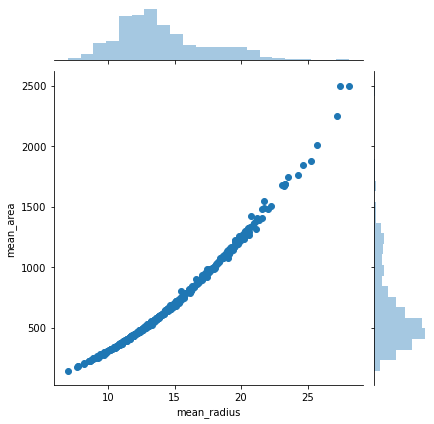

In [6]:
sns.jointplot('mean_radius','mean_area',data=df)

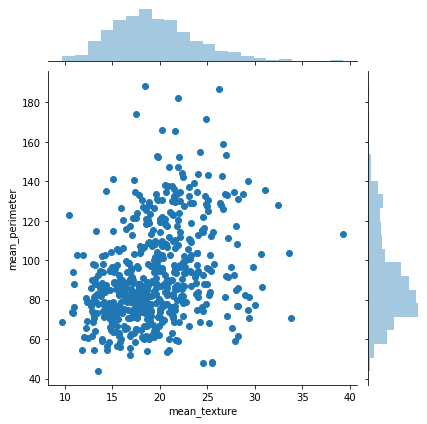

In [7]:
sns.jointplot('mean_texture','mean_perimeter',data=df)

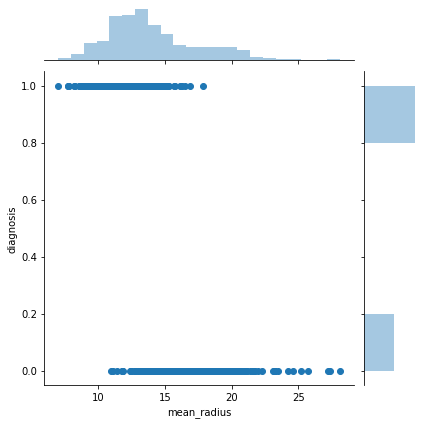

In [8]:
sns.jointplot('mean_radius','diagnosis',data=df)

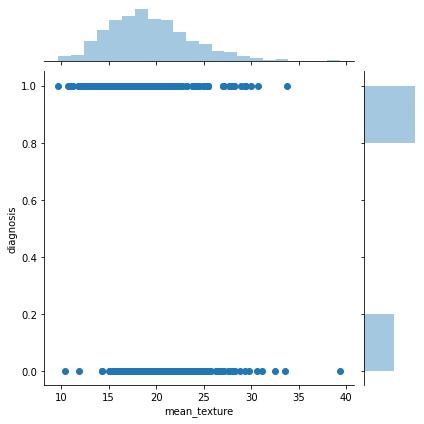

In [9]:
sns.jointplot('mean_texture','diagnosis',data=df)

In [10]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


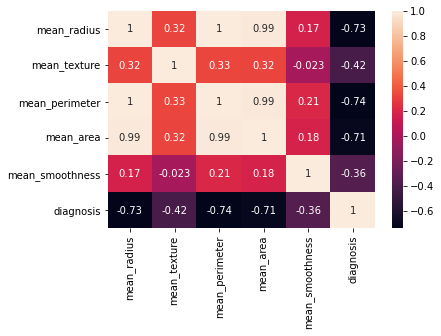

In [11]:
sns.heatmap(df.corr(),annot=True)

In [13]:
X=df.drop(['diagnosis','mean_area','mean_perimeter'],axis=1)
X

,mean_radius,mean_texture,mean_smoothness
0,17.99,10.38,0.11840
1,20.57,17.77,0.08474
2,19.69,21.25,0.10960
3,11.42,20.38,0.14250
4,20.29,14.34,0.10030
...,...,...,...
564,21.56,22.39,0.11100
565,20.13,28.25,0.09780
566,16.60,28.08,0.08455
567,20.60,29.33,0.11780


In [14]:
y=df.diagnosis

In [15]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:
y_train.shape

(455,)

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=50,n_jobs=-1,max_depth=5,verbose=5)

In [56]:
clf.fit(X_train,y_train)

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50building tree 13 of 50

building tree 14 of 50building tree 15 of 50

building tree 16 of 50
building tree 17 of 50building tree 18 of 50

building tree 19 of 50
building tree 20 of 50
building tree 21 of 50building tree 22 of 50

building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50building tree 36 of 50

building tree 37 of 50
building tree 38 of 50building tree 39 of 50

building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50building tree 44 of 5

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, verbose=5)

In [57]:
from sklearn.model_selection import cross_val_score
clf.score(X_test,y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


0.9035087719298246

In [58]:
y_pred=clf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [59]:
# y_pred

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[32,  7],
       [ 4, 71]])

In [24]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [25]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [26]:
ypred=logreg.predict(X_test)

In [27]:
confusion_matrix(y_test,ypred)

array([[30,  9],
       [ 5, 70]])